In [17]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

In [18]:
x = np.array([[3,1], [3,-1], [6,1], [6, -1], [1,0], [0,1], [0,-1], [-1,0]])
y = np.array([1] * 4 + [2] * 4)


SyntaxError: unexpected EOF while parsing (<ipython-input-18-00fdc6355e08>, line 2)

[[0, 3.0], [1.0, 0]]
[[0, 3.0], [-1.0, 0]]
[[0, 1.0], [0.0, 0]]


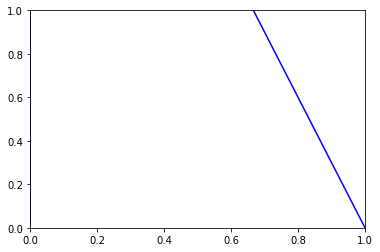

In [35]:
linearSVM = SVC(kernel="linear", C=1.0)
linearSVM.fit(x, y)
for vec in linearSVM.support_vectors_:
    newline(*[[0,vec[0]], [vec[1], 0]], color='b')
    print([[0,vec[0]], [vec[1], 0]])
plt.show()

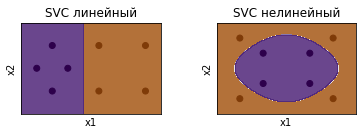

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def kernel(X1, X2):
    print()
    if (X1 ** 2 + X2 ** 2) ** 0.5 > 2:
        return np.array(4 - X2 + np.abs(X1 - X2), 4 - X1 + np.abs(X1 - X2)).T
    else:
        return np.array(X1, X2)



X = np.array([[3,1], [3,-1], [6,1], [6, -1], [1,0], [0,1], [0,-1], [-1,0]])
y = np.array([1] * 4 + [2] * 4)

X_poly = np.array([[2,2], [2,-2], [-2,-2], [-2,2], [1,1], [1,-1], [-1,-1], [-1,1]])
y_poly = np.array([1] * 4 + [2] * 4)

h = .02

C = 1.0  
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
poly_svc = svm.SVC(kernel='rbf',C=C).fit(X_poly, y_poly)



xx, yy = [0,0], [0,0]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx[0], yy[0] = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

x_min, x_max = X_poly[:, 0].min() - 1, X_poly[:, 0].max() + 1
y_min, y_max = X_poly[:, 1].min() - 1, X_poly[:, 1].max() + 1
xx[1], yy[1] = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))                     

# title for the plots
titles = ['SVC линейный',
          'SVC нелинейный']

for i, clf in enumerate((svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx[i].ravel(), yy[i].ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx[i].shape)
    plt.contourf(xx[i], yy[i], Z, cmap='PuOr', alpha=0.8)

    c = y
    if i == 1:
        c = y_poly

    # Plot also the training points
    if i == 0:
        plt.scatter(X[:, 0], X[:, 1], c=c, cmap='PuOr')
    else:
        plt.scatter(X_poly[:, 0], X_poly[:, 1], c=c, cmap='PuOr')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx[i].min(), xx[i].max())
    plt.ylim(yy[i].min(), yy[i].max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


plt.show()

1.0


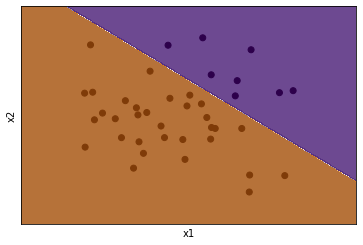

0.525


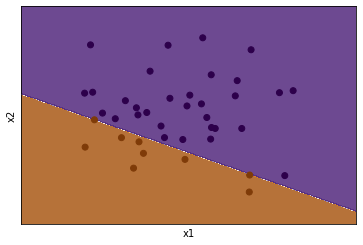

0.9


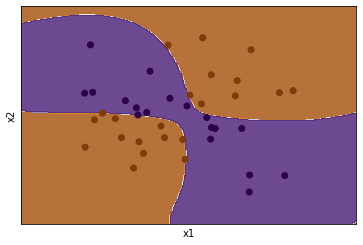

In [38]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

svm1 = pd.read_csv("svm1.csv", sep=",", encoding="utf-8")
svm2 = pd.read_csv("svm2.csv", sep=",", encoding="utf-8")

x_train, x_test, y_train, y_test = map(np.array, train_test_split(svm1.drop(['Y'], axis="columns"), svm1['Y'], test_size = 0.2, random_state = 42))
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='PuOr', alpha=0.8)

# Plot also the training points
predicted = svc.predict(x_test)
print(accuracy_score(y_test, predicted))
plt.scatter(x_test[:, 0], x_test[:, 1], c=predicted, cmap='PuOr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
plt.clf()
#2
x_train, x_test, y_train, y_test = map(np.array, train_test_split(svm2.drop(['Y'], axis="columns"), svm2['Y'], test_size = 0.2, random_state = 42))
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='PuOr', alpha=0.8)

# Plot also the training points
predicted = svc.predict(x_test)
print(accuracy_score(y_test, predicted))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='PuOr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#3
x_train, x_test, y_train, y_test = map(np.array, train_test_split(svm2.drop(['Y'], axis="columns"), svm2['Y'], test_size = 0.2, random_state = 42))
svc = svm.SVC(kernel='rbf', C=C).fit(x_train, y_train)

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='PuOr', alpha=0.8)

# Plot also the training points
predicted = svc.predict(x_test)
print(accuracy_score(y_test, predicted))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='PuOr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
